# **Into to Statistics in Python**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import uniform, binom, norm, poisson, expon
import seaborn as sns

## ***Summary stats***

### Q: What is stats?
A: it is about collecting and analyzing data

### Q: What are 2 types of stats?
A: descriptive stats (describe and summarize data) and inferential stats (from sample make an inference about larger population)

### Q: Two types of data?
A: numeric (quantitative): discrete (counted) + continuous (measured)
A: categorical (qualitative): nominal (unordered) + ordinal (ordered)

### Q: Main types of summary stats?
A: measures of central tendency + measures of dispersion

### Q: What are some common summary statistics discussed in the lesson?
A: Common summary statistics discussed in the lesson include mean, median, and mode.

### Q: How does a histogram visually represent data?
A: A histogram separates data into bins or ranges of values and represents the frequency of data points falling within each bin through the height of bars. Each bar represents a range of values, and its height represents the frequency of data points within that range.

### Q: How is the mean calculated?
A: The mean is calculated by summing up all the values in a dataset and dividing the total by the number of data points.

## Q: How is the median calculated?
A: The median is the middle value of a dataset when it's arranged in ascending or descending order. If there's an even number of data points, the median is the average of the two middle values.

### Q: What does the mode represent?
A: The mode represents the most frequently occurring value in a dataset.

### Q: Why might the mean be affected by outliers more than the median?
A: The mean is more sensitive to outliers because it takes into account the magnitude of each value in the dataset when calculating the average, whereas the median is only influenced by the middle value(s) and is less affected by extreme values.

### Q: When is it more appropriate to use the mean as a measure of center?
A: The mean is more appropriate when dealing with symmetrical data distributions.

### Q: When is it more appropriate to use the median as a measure of center?
A: The median is more appropriate when dealing with skewed data distributions, where the mean might be influenced significantly by outliers.

### Q: How does skewness affect the mean and median?
A: In skewed data distributions, the mean is pulled in the direction of the skew, resulting in the mean being lower than the median in left-skewed distributions and higher than the median in right-skewed distributions.

### Q: Why is the median often preferred over the mean when dealing with skewed data?
A: The median is often preferred over the mean when dealing with skewed data because it is less affected by extreme values and provides a more robust measure of central tendency in such cases.

### Q: What are some examples of skewed data distributions?
A: Examples of skewed data distributions include left-skewed distributions, where the data is piled up on the right with a tail on the left, and right-skewed distributions, where the data is piled up on the left with a tail on the right.

### Q: What is the purpose of practicing measures of center?
A: Practicing measures of center helps in understanding how to summarize and interpret data effectively, especially in different scenarios such as dealing with outliers or skewed distributions.

### Q: What does "spread" refer to in statistics?
A: "Spread" in statistics refers to how spread apart or close together the data points are in a dataset.

### Q: What is variance, and how is it calculated?
A: Variance measures the average distance from each data point to the dataset's mean. It is calculated by summing the squared differences between each data point and the mean, then dividing by the number of data points minus 1.

### Q: How is standard deviation related to variance?
A: Standard deviation is another measure of spread, calculated by taking the square root of the variance. It provides a more interpretable measure as its units are not squared.

### Q: What is the difference between standard deviation and mean absolute deviation (MAD)?
A: While both are measures of spread, standard deviation squares distances from the mean, penalizing longer distances more than shorter ones, whereas mean absolute deviation treats each distance equally.

### Q: What are quantiles, and how are they useful in statistics?
A: Quantiles split up data into equal parts, with each part representing a certain percentage of the data. They are useful for understanding the distribution of data and can help identify outliers.

### Q: What is the interquartile range (IQR), and how is it calculated?
A: The interquartile range (IQR) is the distance between the 25th and 75th percentiles of a dataset. It can be calculated using the quantile function or the `iqr` function.

### Q: How are outliers defined, and how can they be identified?
A: Outliers are data points substantially different from the rest of the dataset. They can be identified using a rule that considers any data point below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR as an outlier.

### Q: How can summary statistics like measures of spread and outliers be calculated efficiently?
A: Many summary statistics, including measures of spread and outliers, can be calculated efficiently using functions like `describe` and specific functions like `quantile`, `iqr`, and `std` available in libraries like NumPy and SciPy.

In [2]:
food_consumption = pd.read_csv("food_consumption.csv")

In [3]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [ ]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'USA') | (food_consumption['country'] == 'Belgium')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

When you want to compare summary statistics between groups, it's much easier to use .groupby() and .agg() instead of subsetting and calling the same functions multiple times.

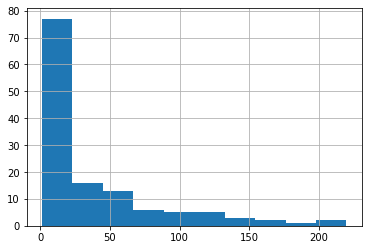

In [7]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

We get right-skewed dataset

In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]
))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


To describe this data median is better as the mean is substantially higher than the median since it's being pulled up by the high values over 100 kg/person/year.

In [9]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [10]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [11]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


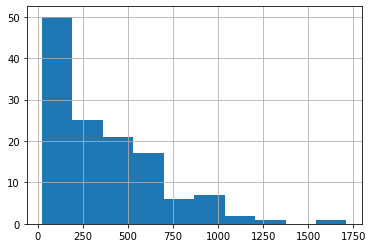

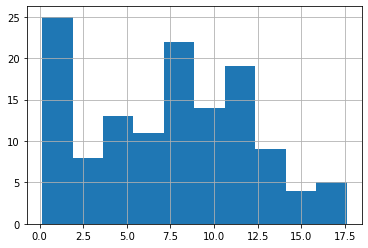

In [12]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
# Show plot
plt.show()

food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
# Show plot
plt.show()

Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [14]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [15]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

In [16]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.

## ***Random numbers and probability***

Here are some questions and answers summarizing the main points from the transcript:

### Q: How do we measure chance in statistics?
A: We measure the chances of an event using probability, which is calculated by dividing the number of ways the event can happen by the total number of possible outcomes.

### Q: What does probability range between?
A: Probability always ranges between zero and 100 percent. If the probability is zero, the event is impossible, and if it's 100 percent, the event will certainly happen.

### Q: How is sampling without replacement different from sampling with replacement?
A: Sampling without replacement means once an item is selected, it is removed from the population, affecting the probabilities of subsequent selections. Sampling with replacement means each item selected is returned to the population before the next selection, maintaining consistent probabilities.

### Q: What is the significance of setting a random seed in Python?
A: Setting a random seed ensures reproducibility in random processes. It allows for the generation of the same random values each time the script is run, which is useful for consistency in testing and presentations.

### Q: Define independent and dependent events in probability.
A: Independent events are events where the outcome of one event does not affect the outcome of the other. Dependent events are events where the outcome of one event affects the outcome of the other.

### Q: How does sampling with replacement affect the independence of events?
A: In sampling with replacement, each pick is independent because the probability of each subsequent pick is not affected by the previous picks.

### Q: Can you explain how probability is calculated in a real-life scenario, such as selecting salespeople for meetings?
A: Probability can be calculated by dividing the number of favorable outcomes (selecting a specific salesperson) by the total number of possible outcomes (number of salespeople). For instance, if there are 4 salespeople and one needs to be selected randomly, the probability of selecting any one of them is 1/4 or 25%.

### Q: How can sampling be implemented in Python, both with and without replacement?
A: In Python, sampling can be implemented using the `sample()` method from libraries like pandas or NumPy. By setting the `replace` argument to True, sampling with replacement can be simulated, and by setting it to False, sampling without replacement can be simulated.

Based on the transcript, here are some questions and answers summarizing the main points:

### Q: What is a probability distribution, and how is it related to outcomes in a scenario?
A: A probability distribution describes the likelihood of each possible outcome in a scenario. It represents the probability of each outcome occurring.

### Q: How do we calculate the expected value of a probability distribution?
A: It can be calculated by multiplying each outcome by its probability and summing the results.

### Q: How can a probability distribution be visualized?
A: A probability distribution can be visualized using a barplot, where each bar represents an outcome, and the height of each bar represents the probability of that outcome.

### Q: How do we calculate probabilities using a probability distribution?
A: Probabilities of different outcomes can be calculated by finding the area under the probability distribution curve corresponding to those outcomes.

### Q: What is a discrete probability distribution, and what are its characteristics?
A: A discrete probability distribution represents situations with discrete outcomes, where each outcome has a specific probability. It is characterized by having distinct, separate outcomes with finite probabilities.

### Q: What is the significance of sampling from a probability distribution?
A: Sampling from a probability distribution allows us to simulate random outcomes from the distribution, which can help us understand its behavior and properties.

### Q: What is the Law of Large Numbers, and how does it relate to probability distributions?
A: The Law of Large Numbers states that as the size of a sample increases, the sample mean will approach the theoretical mean of the distribution. This means that with a larger sample size, the observed outcomes will more closely resemble the expected outcomes from the distribution.

### Q: How does the sample size affect the accuracy of observed outcomes compared to the theoretical distribution?
A: With larger sample sizes, the observed outcomes tend to be closer to the theoretical distribution, and the sample mean approaches the expected value of the distribution. This phenomenon is described by the Law of Large Numbers.

### Q: How are continuous variables modeled in probability distributions?
A: Continuous variables are modeled using continuous probability distributions, which are represented by continuous lines rather than discrete blocks.

### Q: What is the continuous uniform distribution, and how does it work?
A: The continuous uniform distribution is used to model situations where each value within a given range has an equal probability of occurring. In this distribution, the probability density remains constant over the entire range.

### Q: How is probability calculated in continuous uniform distributions?
A: Probability in continuous uniform distributions is still calculated as the area under the probability density function. For example, to find the probability of an event occurring between two points, you calculate the area under the curve between those points.

### Q: How can we use Python to work with continuous uniform distributions?
A: In Python, we can use the `uniform` distribution from the `scipy.stats` module. Functions like `cdf` (cumulative distribution function) and `rvs` (random variable sampling) can be used to calculate probabilities and generate random values, respectively.

### Q: What does it mean for the total area under a probability distribution curve to equal 1?
A: The total area under the curve of a probability distribution always equals 1. This ensures that the sum of all probabilities across all possible outcomes equals 1, indicating certainty that one of the outcomes will occur.

### Q: Besides the continuous uniform distribution, what are some other types of continuous distributions?
A: Other types of continuous distributions include the normal distribution, exponential distribution, and various other specialized distributions. Each distribution has its own unique shape and properties.

### Q: How are random numbers generated according to a continuous uniform distribution?
A: Random numbers following a continuous uniform distribution can be generated using the `rvs` function, which takes the minimum and maximum values of the range and the number of random values to generate.

### Q: What is the significance of the area under the probability distribution curve?
A: The area under the probability distribution curve represents the total probability of all possible outcomes. This area always sums to 1, ensuring that the probabilities are normalized.

### Q: What is the binomial distribution and what does it describe?
A: The binomial distribution describes the probability of the number of successes in a sequence of independent trials, where each trial has two possible outcomes (success or failure).

### Q: How is a single coin flip simulated using the binomial distribution in Python?
A: A single coin flip can be simulated using the `binom.rvs()` function from the `scipy.stats` module, specifying the number of trials as 1 and the probability of heads (or success) as 0.5.

### Q: What are the parameters of the binomial distribution?
A: The binomial distribution has two parameters: \(n\), which represents the total number of trials, and \(p\), which is the probability of success in each trial.

### Q: How can we calculate the probability of a specific number of successes using the binomial distribution?
A: The probability mass function (`binom.pmf()`) can be used to calculate the probability of a specific number of successes given the parameters \(n\) and \(p\) of the binomial distribution.

### Q: What is the expected value of the binomial distribution and how is it calculated?
A: The expected value of the binomial distribution is calculated by multiplying the number of trials (\(n\)) by the probability of success (\(p\)). It represents the average number of successes in the given number of trials.

### Q: Why is independence of trials important in the binomial distribution?
A: Independence ensures that the outcome of one trial does not affect the outcome of another trial. This is essential for the binomial distribution to accurately model the probability of successes in a sequence of trials.

### Q: Can the binomial distribution be applied to situations with dependent trials?
A: No, the binomial distribution cannot be accurately applied to situations with dependent trials because the assumption of independence is violated. In such cases, other distributions or methods should be used.

### Q: What are some examples of binary outcomes besides coin flipping?
A: Binary outcomes include scenarios such as success or failure, win or loss, yes or no, and 1 or 0, among others. These outcomes can be modeled using the binomial distribution when the trials are independent.

In [17]:
amir_deals = pd.read_csv("amir_deals.csv")

In [18]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [19]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [20]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [21]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


In [23]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [24]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


In [25]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


In [26]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


In [27]:
# Set random seed to 334
np.random.seed(334)

In [28]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, 1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

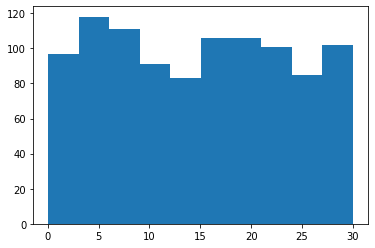

In [29]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

In [33]:
# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(deals.mean())

[1]
[0]
0.8461538461538461


In this simulated year, Amir won 0.83 deals on average each week.

In [34]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [35]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [36]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - 0.784

print(prob_greater_than_1)

0.21599999999999997


In [37]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.

## ***More Distributions and the Central Limit Theorem***

### Q: What is the normal distribution and what is another name for it?
A: The normal distribution, often referred to as a "bell curve," is a symmetrical probability distribution that describes many natural phenomena. It is characterized by its mean and standard deviation.

### Q: What are some key properties of the normal distribution?
A: Some key properties of the normal distribution include its symmetry, the fact that the area under the curve equals 1, and that it extends infinitely in both directions without ever touching zero probability.

### Q: How are mean and standard deviation related to the normal distribution?
A: The normal distribution is described by its mean (center) and standard deviation (spread). A special case is the standard normal distribution, which has a mean of 0 and a standard deviation of 1.

### Q: What is the 68-95-99.7 rule in the context of the normal distribution?
A: The 68-95-99.7 rule states that approximately 68% of the data falls within one standard deviation of the mean, about 95% falls within two standard deviations, and around 99.7% falls within three standard deviations.

### Q: How can the normal distribution be used to approximate real-world data?
A: The normal distribution can be used to approximate real-world data that closely resembles its shape. By knowing the mean and standard deviation of the data, percentages of observations falling within certain ranges can be calculated.

### Q: How can the normal distribution be used to answer questions about percentages of a population?
A: By using functions like `norm.cdf()` and `norm.ppf()` from `scipy.stats`, one can calculate the percentage of a population falling below or above a certain value, between two values, or find the value corresponding to a given percentage.

### Q: How can random numbers be generated from a normal distribution?
A: Random numbers from a normal distribution can be generated using the `norm.rvs()` function, specifying the mean and standard deviation of the distribution, as well as the desired sample size.

### Q: What are some examples of real-world phenomena that can be modeled using the normal distribution?
A: Real-world phenomena that can be modeled using the normal distribution include heights, weights, test scores, IQ scores, and many other measurable quantities where data clusters around a central value with a symmetric spread.

### Q: How does the normal distribution play a crucial role in statistics and data analysis?
A: The normal distribution is foundational in statistics and data analysis because many statistical methods and hypothesis tests rely on the assumption of normality. Additionally, it provides a framework for understanding variability and making predictions based on data.

### Q: What is the central limit theorem?
A: The central limit theorem (CLT) states that the sampling distribution of a sample statistic, such as the sample mean or sample proportion, will tend to be normally distributed as the sample size increases, regardless of the shape of the population distribution.

### Q: How is the central limit theorem demonstrated using the example of rolling a die?
A: The central limit theorem is demonstrated by repeatedly rolling a die and calculating the mean of the outcomes. As the number of rolls increases, the distribution of these sample means approaches a normal distribution.

### Q: What are some key points about the central limit theorem?
A: 
1. The CLT applies to the sampling distribution of various sample statistics, not just the sample mean.
2. It requires random sampling and independence of observations.
3. The sampling distribution approaches normality as the sample size increases, even if the population distribution is not normal.
4. It allows for the estimation of population parameters based on sample statistics.

### Q: How does the central limit theorem apply to different summary statistics?
A: The CLT applies not only to the sample mean but also to other summary statistics such as the sample standard deviation and sample proportion. As the sample size increases, the sampling distributions of these statistics tend to become more normally distributed.

### Q: How can the central limit theorem be used in practice?
A: The CLT is useful for estimating population parameters based on sample statistics, especially when dealing with large populations where it's impractical to collect data on every individual. By taking multiple random samples and analyzing their sampling distributions, one can estimate population characteristics such as the mean or standard deviation.

### Q: What are some limitations or assumptions of the central limit theorem?
A: The central limit theorem assumes random sampling and independence of observations. It may not apply well to small sample sizes or when these assumptions are violated. Additionally, the convergence to a normal distribution may be slow for certain types of population distributions.

### Q: What is a Poisson process?
A: A Poisson process is a random process where events occur at a constant average rate over a given interval of time or space, but the timing of individual events is unpredictable. Examples include the number of customers arriving at a store per hour or the number of phone calls received at a call center per minute.

### Q: How is the Poisson distribution defined?
A: The Poisson distribution describes the probability of a certain number of events occurring within a fixed interval of time or space in a Poisson process. It is characterized by a single parameter, lambda (λ), which represents the average rate of event occurrences in the given interval.

### Q: What is the significance of the parameter lambda (λ) in the Poisson distribution?
A: Lambda (λ) represents the average number of events that occur in the specified interval. It is also the mean or expected value of the Poisson distribution. Lambda determines both the shape and location of the distribution's peak.

### Q: How can the Poisson distribution be used to calculate probabilities?
A: The Poisson distribution can be used to calculate the probability of observing a specific number of events within the interval. This can be done using the probability mass function (PMF) for a given value or the cumulative distribution function (CDF) for a range of values.

### Q: What does the shape of the Poisson distribution look like, and how does it change with different values of lambda?
A: The Poisson distribution is a discrete probability distribution with a peak at its mean value (lambda). As lambda changes, the shape of the distribution also changes. Higher values of lambda result in distributions that are more spread out, while lower values lead to distributions that are more concentrated around the mean.

### Q: How can samples be generated from a Poisson distribution?
A: Samples can be generated from a Poisson distribution using the `poisson.rvs()` function from the `scipy.stats` module in Python. This function generates random variates from a Poisson distribution based on the specified lambda parameter.

### Q: How does the central limit theorem apply to the sampling distribution of sample means from a Poisson distribution?
A: Like other distributions, the sampling distribution of sample means from a Poisson distribution tends to become approximately normal as the sample size increases, according to the central limit theorem. This allows for the application of statistical methods that assume normality, even when dealing with Poisson data.

### Q: What is the exponential distribution?
A: 
The exponential distribution represents the probability of a certain time passing between Poisson events. It is used to predict the probability of events occurring within specific time intervals, such as the time between customer service requests, the time between arrivals at a restaurant, or the time between earthquakes. The exponential distribution is characterized by a parameter lambda (λ), which represents the rate of events and is also known as the mean number of events per unit time.

### Q: How does the rate parameter affect the exponential distribution?
A: 
The rate parameter (lambda, λ) determines the shape of the exponential distribution and how steeply it declines. A higher lambda value results in a steeper decline, indicating a higher frequency of events occurring within a given time interval. Conversely, a lower lambda value leads to a slower decline, indicating fewer events occurring within the same time interval.

### Q: What is the expected value of the exponential distribution?
A: 
The expected value of the exponential distribution can be calculated by taking the reciprocal of the rate parameter (λ). In other words, if λ represents the average number of events per unit time, then the expected time between events is 1/λ. For example, if λ = 0.5 (representing one event every 2 minutes), the expected time between events is 1 / 0.5 = 2 minutes.

### Q: How can probabilities be calculated with the exponential distribution?
A: 
Probabilities in the exponential distribution can be calculated using the cumulative distribution function (CDF). For example, to find the probability of waiting less than 1 minute for a new request, one would use the `expon.cdf` function with a time threshold of 1 and the rate parameter (λ). Similarly, the probability of waiting between two specific time intervals can be calculated by subtracting the cumulative probabilities at those intervals.

### Q: What is the t-distribution and how does it differ from the normal distribution?
A: 
The t-distribution, also known as Student's t-distribution, is a probability distribution that resembles the normal distribution but has thicker tails. These thicker tails indicate that observations in a t-distribution are more likely to fall further from the mean compared to the normal distribution. The t-distribution is characterized by a parameter called degrees of freedom, which affects the thickness of the distribution's tails.

### Q: What is the significance of degrees of freedom in the t-distribution?
A: 
Degrees of freedom is a parameter in the t-distribution that determines the shape of the distribution's tails. Lower degrees of freedom result in thicker tails and a higher standard deviation, while higher degrees of freedom lead to thinner tails, resembling the normal distribution more closely. As the number of degrees of freedom increases, the t-distribution converges towards the normal distribution.

### Q: What is the log-normal distribution and how does it differ from the normal distribution?
A: 
The log-normal distribution is a probability distribution where the logarithm of the data follows a normal distribution. This results in distributions that are skewed, unlike the symmetrical normal distribution. Real-world examples of phenomena that follow a log-normal distribution include the length of chess games, blood pressure in adults, and the number of hospitalizations during outbreaks.

### Q: How can one practice and learn more about probability distributions?
A: 
In addition to the distributions covered in this lesson, there are numerous other probability distributions that one can learn about in other courses. Practicing the distributions learned so far is essential to gaining a deeper understanding of their applications and characteristics.

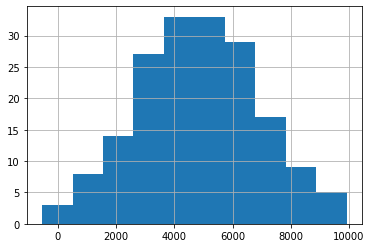

In [38]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

In [42]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

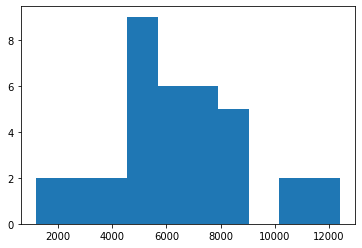

In [43]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones.

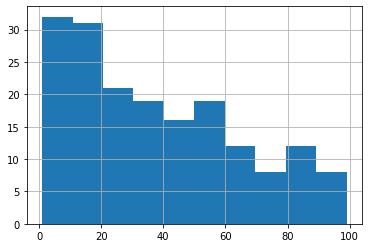

In [44]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [ ]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution.

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!

In [49]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5 ,5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


In [ ]:
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

There's only about a 20% chance it will take Amir more than 4 hours to respond

## ***Correlation and Experimental Design***

### Q: What is correlation?
A: 
Correlation refers to the measure of association or relationship between two numeric variables. It helps us understand how changes in one variable are associated with changes in another variable.

### Q: How is correlation visualized?
A: 
Correlation can be visualized using scatter plots, where each point represents a pair of observations for the two variables being analyzed. The scatter plot allows us to observe the pattern or trend between the variables, such as whether they move in the same direction (positive correlation), opposite directions (negative correlation), or show no apparent relationship.

### Q: What is the correlation coefficient?
A: 
The correlation coefficient is a numerical measure that quantifies the strength and direction of the relationship between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. The sign of the correlation coefficient indicates the direction of the relationship (positive or negative), while the magnitude indicates the strength.

### Q: How is correlation coefficient computed?
A: 
The correlation coefficient, often denoted as \( r \), is computed using a formula that involves the means and standard deviations of the two variables. The most commonly used method for computing correlation is the Pearson product-moment correlation, which calculates the linear relationship between variables. Other methods, such as Kendall's tau and Spearman's rho, exist for measuring correlation, but they assess different types of relationships and patterns.

### Q: How are correlations visualized using Python?
A: 
Correlations can be visualized using Python libraries such as seaborn and matplotlib. Scatter plots can be created using seaborn's `scatterplot` function, and trendlines can be added using the `lmplot` function. These visualizations help in understanding the relationship between variables and identifying any patterns or trends present in the data.

### Q: Can correlation be used to infer causation?
A: 
No, correlation does not imply causation. While a strong correlation between two variables may suggest a relationship, it does not necessarily mean that changes in one variable cause changes in the other. Correlation measures only the degree of association between variables and does not provide information about causality. Establishing causation requires further analysis and experimentation.

### Q: What are some caveats of using correlation as a measure of relationship between variables?
A: 
Correlation is a useful measure, but it has limitations:
1. **Non-linear relationships**: Correlation measures the strength of linear relationships only. If the relationship between variables is non-linear, correlation may not accurately capture it.
2. **Correlation vs. causation**: Correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other. There could be other hidden variables at play, leading to spurious correlations.
3. **Confounding variables**: Confounding variables, also known as lurking variables, can distort the relationship between variables by influencing both of them. Ignoring confounding variables can lead to incorrect interpretations of correlations.

### Q: How can non-linear relationships affect correlation?
A: 
Correlation measures the strength of linear relationships between variables. If the relationship between variables is non-linear, correlation may not accurately capture it. For example, a quadratic relationship between variables will not be well-represented by correlation, as correlation only accounts for linear associations.

### Q: How can skewed data distributions affect correlation analysis?
A: 
Skewed data distributions can affect correlation analysis by distorting the relationship between variables. When data is highly skewed, applying transformations such as logarithmic transformation can help make the relationship more linear. Ignoring skewed distributions and failing to apply appropriate transformations can lead to inaccurate correlation estimates.

### Q: What is the significance of confounding variables in correlation analysis?
A: 
Confounding variables, also known as lurking variables, are third variables that can distort the relationship between variables of interest. When confounding variables are not accounted for, correlations between variables may be misleading, leading to incorrect interpretations. It is essential to identify and control for confounding variables to ensure accurate analysis and interpretation of correlations.

### Q: How does correlation differ from causation?
A: 
Correlation measures the degree of association between two variables but does not imply causation. Correlation indicates that two variables change together, but it does not establish a causal relationship between them. Causation implies that changes in one variable directly cause changes in another variable, which correlation alone cannot determine.

### Q: What is the purpose of experiments, and how are they typically structured?
A: Experiments aim to answer questions about the effect of a treatment on a response variable. They usually involve comparing groups, with one group receiving the treatment (treatment group) and another group not receiving the treatment (control group).

### Q: Describe the vocabulary associated with experiments.
A: In experiments, the treatment refers to the independent variable being studied, while the response refers to the dependent variable being measured. For example, in studying the effect of an advertisement on product purchases, the advertisement is the treatment, and the number of products purchased is the response.

### Q: What is a controlled experiment, and why is random assignment important?
A: In a controlled experiment, participants are randomly assigned to either the treatment or control group. Random assignment is crucial because it helps ensure that the groups are comparable, minimizing the potential for confounding variables to bias the results.

### Q: What are some tools used in the gold standard of experiments, and how do they help reduce bias?
A: The gold standard of experiments employs randomized controlled trials, placebos, and double-blind procedures. Random assignment ensures groups are comparable, placebos help distinguish treatment effects from placebo effects, and double-blind procedures prevent bias in administering treatments and analyzing results.

### Q: How do observational studies differ from controlled experiments, and what limitations do they have?
A: Observational studies do not involve random assignment of participants to groups; instead, participants self-select based on pre-existing characteristics. These studies can't establish causation, only association, and are susceptible to confounding variables influencing the results.

### Q: What is the difference between longitudinal and cross-sectional studies, and what are their respective advantages?
A: Longitudinal studies follow the same participants over time, while cross-sectional studies collect data from different participants at a single point in time. Longitudinal studies eliminate confounding by following participants, but they are more expensive and time-consuming. Cross-sectional studies are cheaper and faster but are more prone to confounding.

In [52]:
world_happiness = pd.read_csv("world_happiness.csv")

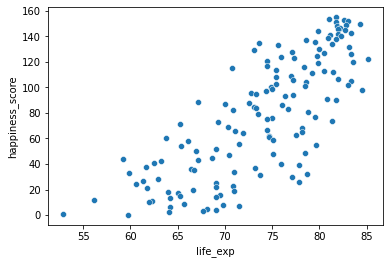

In [56]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

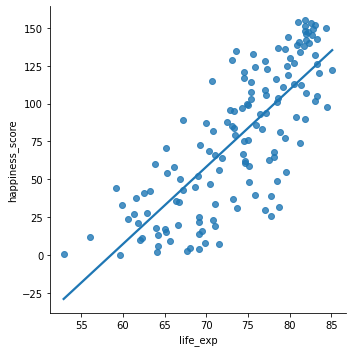

In [57]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

In [59]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272065


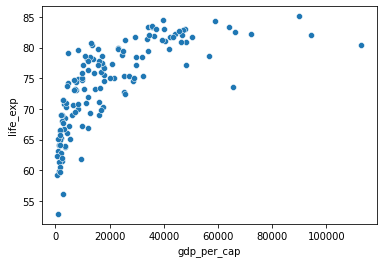

In [60]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [ ]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

The correlation coefficient can't account for any relationships that aren't linear, regardless of strength.

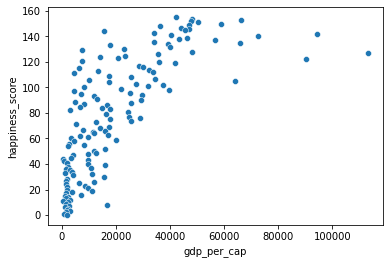

0.7279733012222976


In [62]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

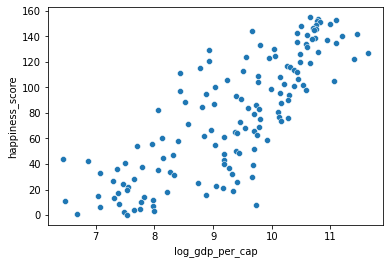

0.8043146004918289


In [63]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP.

![fun image at the end](images/numbersdontaddup.webp)